In [11]:
#Cargamos librerías

import numpy as np
import pandas as pd
import seaborn as sns             # statistical data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import warnings
import statsmodels.api as sm
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
warnings.filterwarnings('ignore')



In [12]:
#Cargamos datos diarios para el primer ser de keywords
# Ruta al archivo CSV
ruta_csv_d = r"C:\Users\34645\Desktop\Doctorado_II\Códigos_Python\IEDIS\Data\Spain\Aragón\Clean\Google_Trends.Zaragoza_1_Daily.csv"

# Cargar el CSV en un DataFrame para las frecuencias dirias, semanales y mensuales 
df = pd.read_csv(ruta_csv_d, delimiter = ',', encoding='utf-8')

# Convertir la columna "Fecha" a tipo datetime
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')
print(df.head())

   ansiedad  depresión  psicólogo  psicoterapia  desánimo      Fecha
0         0          0          0             0         0 2018-06-01
1         0          0          0             0         0 2018-06-02
2       100          0          0             0         0 2018-06-03
3       100          0          0             0         0 2018-06-04
4         0          0          0             0         0 2018-06-05


In [13]:
#Comenzamos análisis exxploratorio 
print(df[df.isnull()].count())
print(df[df.Fecha.duplicated()]['Fecha'].count())

print('Fecha inicio del histórico: ', df.Fecha.min())
print('Fecha fin del histórico: ', df.Fecha.max())
print('Número total de días: ', df.Fecha.nunique())

ansiedad        0
depresión       0
psicólogo       0
psicoterapia    0
desánimo        0
Fecha           0
dtype: int64
0
Fecha inicio del histórico:  2018-06-01 00:00:00
Fecha fin del histórico:  2023-09-19 00:00:00
Número total de días:  1918


In [17]:
# Aplicar promedio semanal para la consistencia de las series 

date_range = pd.period_range(start=df['Fecha'].min(), end=df['Fecha'].max(), freq='W-SUN')
date_range = date_range.map(str)
date_range = date_range.str.split('/').str[0]
date_range = pd.Series(date_range)


# Seleccionamos las columnas que deseas promediar
columns_to_average = ['ansiedad', 'depresión', 'psicólogo', 'psicoterapia', 'desánimo']
    
data_grouped = df.groupby([[i // 7 for i in range(len(df))]], axis=0)[columns_to_average].mean()
data_grouped = data_grouped.assign(Weeks=date_range)
    


<Axes: title={'center': 'Google search volume for keywords in Zaragoza'}>

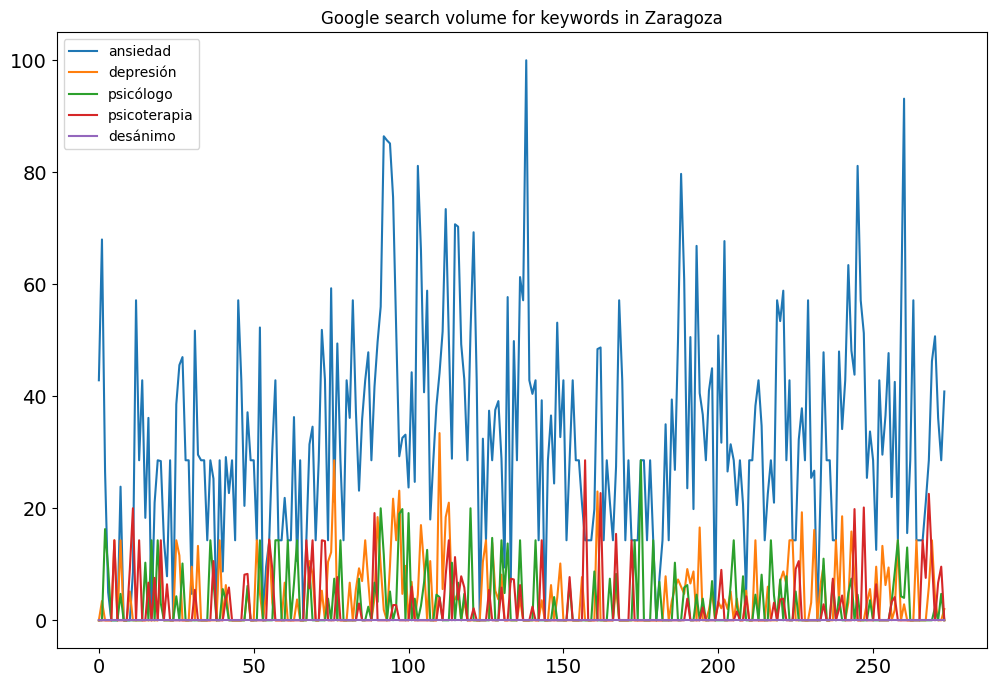

In [21]:
#Graficamos serie
data_grouped[['ansiedad', 'depresión', 'psicólogo', 'psicoterapia', 'desánimo']].plot(figsize=(12,8), title= 'Google search volume for keywords in Zaragoza', fontsize=14)



In [24]:
decomposition = seasonal_decompose(df.ansiedad)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None